# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-12-02 00:34:21.886610: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Train Shape:  (50000, 32, 32, 3)
Test Shape:  (10000, 32, 32, 3)
Shape of single image:  (32, 32, 3)
Number of classes:  100


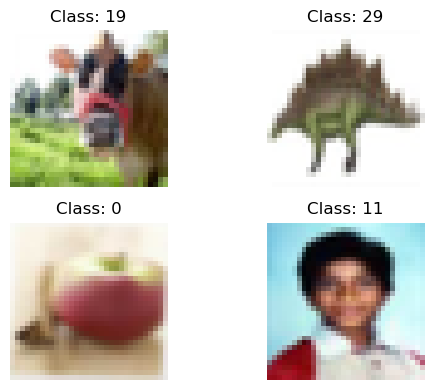

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Your code here
# Train shape
print("Train Shape: ", x_train.shape)

# Test shape
print("Test Shape: ", x_test.shape)

# Shape of the image
print("Shape of single image: ", x_train[0].shape)

# Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes: ", num_classes)

# Display a few examples
fig, axes = plt.subplots(2, 2, figsize=(6, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.set_title(f"Class: {y_train[i][0]}")
    ax.axis('off')

plt.tight_layout()
plt.show()


### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [3]:
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize the images
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [4]:
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)
print("Training labels shape:", y_train.shape)
print("Validation labels shape:", y_val.shape)
print("Test labels shape:", y_test.shape)

print("Shape of one-hot encoded labels:", y_train.shape)

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Training labels shape: (40000, 100)
Validation labels shape: (10000, 100)
Test labels shape: (10000, 100)
Shape of one-hot encoded labels: (40000, 100)


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [ ]:
# Define the model
model = Sequential([
    # First Convolutional Layer
    Conv2D(128, (3, 3), padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),
    
    # Second Convolutional Layer
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Third Convolutional Layer
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(256, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.2),

    # Flatten layer
    Flatten(),
    Dense(512),
    Activation('relu'),
    Dropout(0.2),
    BatchNormalization(momentum=0.95, 
                       epsilon=0.005,
                       beta_initializer=RandomNormal(mean=0.0, stddev=0.05), 
                       gamma_initializer=Constant(value=0.9)),
    Dense(100, activation='softmax')
])


In [7]:
# Display model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 128)    │         3,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 16, 16, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 8, 8, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 256)      │             

 Total params: 4,372,708 (16.68 MB)

 Trainable params: 4,369,124 (16.67 MB)

 Non-trainable params: 3,584 (14.00 KB)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> ______
- <b>Optimizer:</b> ______

In [8]:
from keras import optimizers

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)


Loss function (Categorical Crossentropy): This is the most appropriate choice for multi-class classification problems. It measures the dissimilarity between the predicted probability distribution and the true distribution of the classes, which is ideal for our one-hot encoded labels.  

Optimizer (Adam): Adam (Adaptive Moment Estimation) is a popular choice for deep learning models. It combines the benefits of RMSprop and momentum, adapting the learning rate for each parameter. This makes it efficient and effective for a wide range of problems, especially for large datasets and models like our CNN for CIFAR-100.  

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [9]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Train the model
history = model.fit(
    x_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Print final results
final_train_loss, final_train_accuracy = model.evaluate(x_train, y_train, verbose=0)
final_val_loss, final_val_accuracy = model.evaluate(x_val, y_val, verbose=0)

print(f"Final Training Accuracy: {final_train_accuracy:.4f}")
print(f"Final Validation Accuracy: {final_val_accuracy:.4f}")


Epoch 1/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 584s 464ms/step - accuracy: 0.0941 - loss: 4.0457 - val_accuracy: 0.2273 - val_loss: 3.1484 - learning_rate: 0.0010
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 615s 492ms/step - accuracy: 0.2697 - loss: 2.9028 - val_accuracy: 0.2642 - val_loss: 2.9486 - learning_rate: 0.0010
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 600s 480ms/step - accuracy: 0.3699 - loss: 2.4165 - val_accuracy: 0.3451 - val_loss: 2.5895 - learning_rate: 0.0010
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 604s 483ms/step - accuracy: 0.4362 - loss: 2.1005 - val_accuracy: 0.3936 - val_loss: 2.3100 - learning_rate: 0.0010
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 596s 477ms/step - accuracy: 0.4851 - loss: 1.8800 - val_accuracy: 0.4425 - val_loss: 2.1092 - learning_rate: 0.0010
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 609s 487ms/step - accuracy: 0.5294 - loss: 1.6884 - val_accuracy: 0.4586 - val_loss: 2.0336 - learning_rate: 0.0010
Epoch 7/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 605

In [10]:
model.save('my_model.h5')

In [12]:
# Save only the weights
model.save_weights('my_model.weights.h5')

In [13]:
import json

# Save history to a JSON file
with open('training_history.json', 'w') as f:
    json.dump(history.history, f)

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> ______
- <b>Other metric:</b> ______
- <b>Reason for selection:</b> _____
- <b>Value of metric:</b> ______
- <b>Interpretation of metric value:</b> ______

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Get predictions on test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)  

# Calculate accuracy
accuracy = accuracy_score(y_true_classes, y_pred_classes)

# Calculate F1-score (macro average)
f1 = f1_score(y_true_classes, y_pred_classes, average='macro')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1-score (macro): {f1:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step
Test Accuracy: 0.6135
Test F1-score (macro): 0.6129


Test Accuracy: 0.6135  
Test F1-score (macro): 0.6129  

<b>Reason for selection:</b> F1-score is chosen because it provides a balanced measure of precision and recall, which is particularly useful for multi-class classification problems with imbalanced classes (which CIFAR-100 might have). The macro average calculates the metric independently for each class and then takes the average, treating all classes equally. This is important for CIFAR-100 as it has 100 classes, and we want to ensure good performance across all classes, not just the most common ones.  

<b>Interpretation of metric value:</b> A macro F1-score of 0.6129 indicates that, on average, the model achieves a reasonably balanced trade-off between precision and recall across all 100 classes. However, there is room for improvement to ensure more consistent performance across classes, especially for those that might be less represented in the dataset.

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

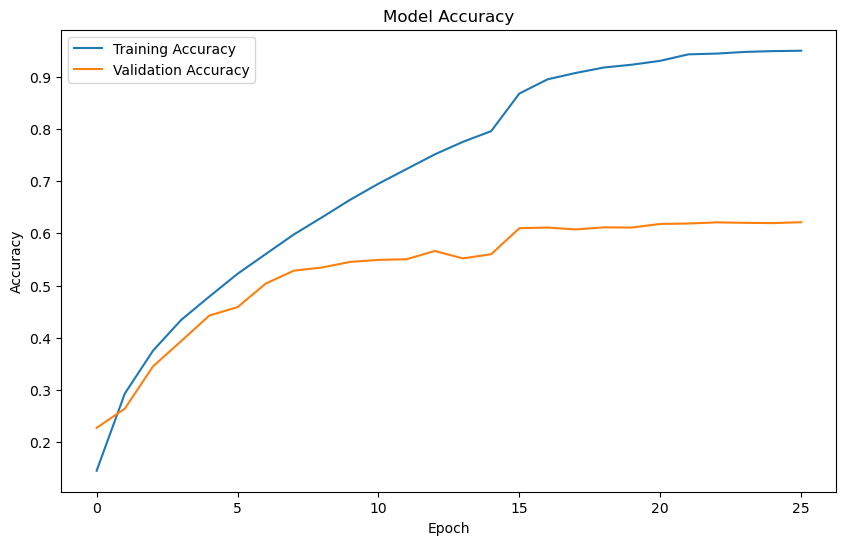

In [15]:
# Plot the training accuracy and validation accuracy with respect to epochs.
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

This plot displays the training and validation accuracy over the epochs:  

Observation: The training accuracy consistently increases over the epochs, approaching nearly 100%, indicating that the model is learning the patterns in the training data effectively. However, the validation accuracy plateaus around 60% after a few epochs, with a noticeable gap between training and validation accuracies.
Interpretation: This gap suggests that the model might be overfitting. While it performs well on the training data, it struggles to generalize to the validation set, which could be due to insufficient regularization, excessive model complexity, or limited data diversity.  

Next Steps: To address overfitting, techniques such as increased regularization (e.g., higher dropout rates), data augmentation, or reducing model complexity could be considered.  

313/313 ━━━━━━━━━━━━━━━━━━━━ 32s 102ms/step


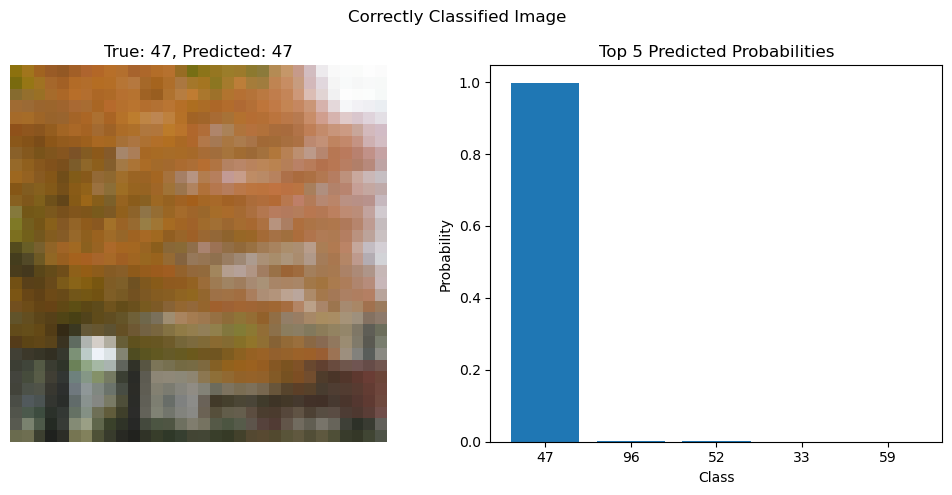

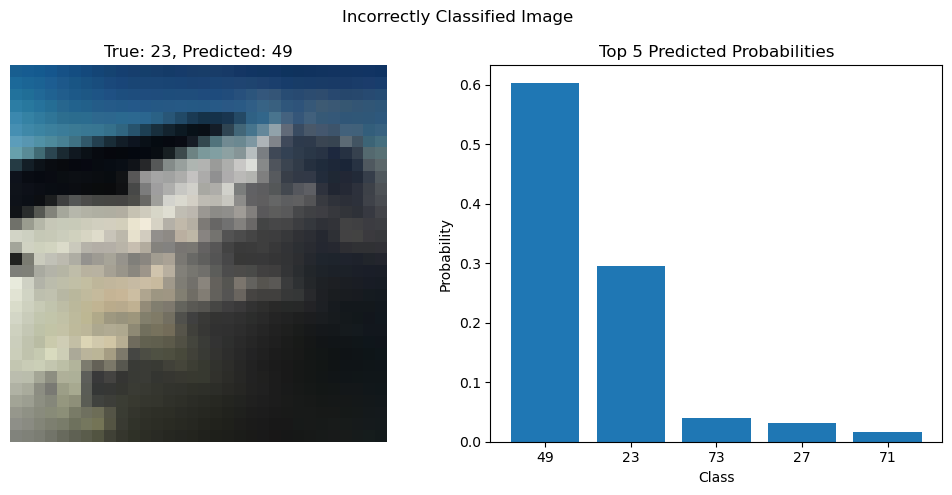

In [16]:
# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Find indices of correct and incorrect predictions
correct_indices = np.where(y_pred_classes == y_true_classes)[0]
incorrect_indices = np.where(y_pred_classes != y_true_classes)[0]

# Select one correct and one incorrect prediction
correct_idx = np.random.choice(correct_indices)
incorrect_idx = np.random.choice(incorrect_indices)

# Function to plot image and probabilities
def plot_prediction(idx, title):
    plt.figure(figsize=(10, 5))
    
    # Plot image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true_classes[idx]}, Predicted: {y_pred_classes[idx]}")
    plt.axis('off')
    
    # Plot probabilities
    plt.subplot(1, 2, 2)
    top_5_idx = np.argsort(y_pred[idx])[-5:][::-1]
    top_5_probs = y_pred[idx][top_5_idx]
    plt.bar(range(5), top_5_probs)
    plt.xticks(range(5), top_5_idx)
    plt.title('Top 5 Predicted Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot correct and incorrect predictions
plot_prediction(correct_idx, "Correctly Classified Image")
plot_prediction(incorrect_idx, "Incorrectly Classified Image")

<b>Correctly Classified Image</b>  
True Label: 47
Predicted Label: 47
Top 5 Predicted Probabilities: The bar chart shows a very high probability (~1.0) for the true class (47), and negligible probabilities for the other top 4 predicted classes.  

The model confidently predicted the correct class for this image, as evident from the high probability for the true label. Yes, the high probability and accurate prediction indicate that the model has learned to correctly classify this specific image and its associated features effectively.  

<b>Incorrectly Classified Image </b>   
True Label: 23
Predicted Label: 49
Top 5 Predicted Probabilities: The bar chart shows the highest probability for class 49, which was incorrectly predicted. The true class (23) has the second-highest probability but is significantly lower than the predicted class.  

The model misclassified the image, assigning a higher probability to an incorrect class (49) than the true class (23). The relatively close probabilities between these two classes indicate some confusion in the model's understanding.  
This could be due to visual similarities between the true and predicted classes or insufficient differentiation in the learned feature space for these classes. Examining the dataset for similar patterns might clarify this.  



## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the data augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
)

In [18]:
# Prepare the data generator for the training set
datagen.fit(x_train)

#### Data augmentation is chosen for further hypertuning because:
- Effectively Increases Dataset Size: By applying random transformations (such as rotations, flips) to the existing training data, we can artificially increase the size and diversity of the dataset without requiring additional data collection. This helps mitigate issues caused by having a limited dataset, reducing the risk of overfitting.  
- Improves Robustness and Generalization: Data augmentation helps the model learn invariance to specific transformations, such as rotated or flipped images, which are often encountered in real-world scenarios. For example, recognizing an object should not depend on its orientation or whether it has been mirrored.
- Reduces Overfitting: By introducing variations during training, the model is less likely to memorize the training data and more likely to generalize well to unseen data.


#### Selection of Parameters for Data Augmentation
- rotation_range=20: This allows random rotations of the images up to 20 degrees in either direction. The value is chosen to allow moderate variation without excessively distorting the images, ensuring that the objects in the images remain recognizable.

- horizontal_flip=True: This enables random horizontal flipping of images. This transformation is suitable for CIFAR-100 since objects like animals, vehicles, and scenes are usually symmetric or can exist in either orientation.

- Other Augmentation Options: Additional transformations like width_shift_range, height_shift_range, and zoom_range can also be applied for further diversity. These were not used here but could be tuned based on dataset characteristics and the model's performance.

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [19]:
# Train the enhanced model using data augmentation
history_augmented = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=100,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/100


/Users/chetankumar/anaconda3/envs/dsi_participant/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1250/1250 ━━━━━━━━━━━━━━━━━━━━ 634s 506ms/step - accuracy: 0.6076 - loss: 1.6340 - val_accuracy: 0.5936 - val_loss: 1.7645 - learning_rate: 8.0000e-06
Epoch 2/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 626s 501ms/step - accuracy: 0.6150 - loss: 1.5838 - val_accuracy: 0.5914 - val_loss: 1.7622 - learning_rate: 8.0000e-06
Epoch 3/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 599s 479ms/step - accuracy: 0.6243 - loss: 1.5515 - val_accuracy: 0.5950 - val_loss: 1.7577 - learning_rate: 8.0000e-06
Epoch 4/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 611s 489ms/step - accuracy: 0.6173 - loss: 1.5600 - val_accuracy: 0.5938 - val_loss: 1.7521 - learning_rate: 8.0000e-06
Epoch 5/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 602s 482ms/step - accuracy: 0.6241 - loss: 1.5366 - val_accuracy: 0.5936 - val_loss: 1.7504 - learning_rate: 8.0000e-06
Epoch 6/100
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 608s 486ms/step - accuracy: 0.6265 - loss: 1.5132 - val_accuracy: 0.5940 - val_loss: 1.7444 - learning_rate: 8.0000e-06
Epoch 7/100
1250/1250 ━━━━━━━━━━━━

In [20]:
# Evaluate the enhanced model
final_train_loss_aug, final_train_accuracy_aug = model.evaluate(x_train, y_train, verbose=0)
final_val_loss_aug, final_val_accuracy_aug = model.evaluate(x_val, y_val, verbose=0)
final_test_loss_aug, final_test_accuracy_aug = model.evaluate(x_test, y_test, verbose=0)

print(f"Enhanced Model - Final Training Accuracy: {final_train_accuracy_aug:.4f}")
print(f"Enhanced Model - Final Validation Accuracy: {final_val_accuracy_aug:.4f}")
print(f"Enhanced Model - Final Test Accuracy: {final_test_accuracy_aug:.4f}")

Enhanced Model - Final Training Accuracy: 0.9722
Enhanced Model - Final Validation Accuracy: 0.5936
Enhanced Model - Final Test Accuracy: 0.5961


In [21]:
# Get predictions for the test set
y_pred_aug = model.predict(x_test)
y_pred_classes_aug = np.argmax(y_pred_aug, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Calculate accuracy and F1-score
from sklearn.metrics import accuracy_score, f1_score

accuracy_aug = accuracy_score(y_true_classes, y_pred_classes_aug)
f1_score_aug = f1_score(y_true_classes, y_pred_classes_aug, average='macro')

print(f"Enhanced Model - Test Accuracy: {accuracy_aug:.4f}")
print(f"Enhanced Model - Test F1-score (macro): {f1_score_aug:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 106ms/step
Enhanced Model - Test Accuracy: 0.5961
Enhanced Model - Test F1-score (macro): 0.5934


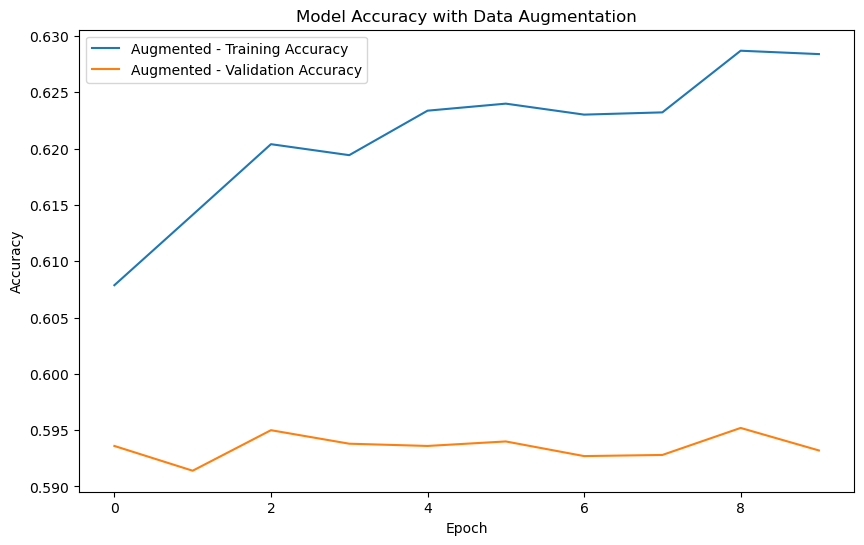

In [23]:
# Plot the training and validation accuracy for both models
plt.figure(figsize=(10, 6))
plt.plot(history_augmented.history['accuracy'], label='Augmented - Training Accuracy')
plt.plot(history_augmented.history['val_accuracy'], label='Augmented - Validation Accuracy')
plt.title('Model Accuracy with Data Augmentation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

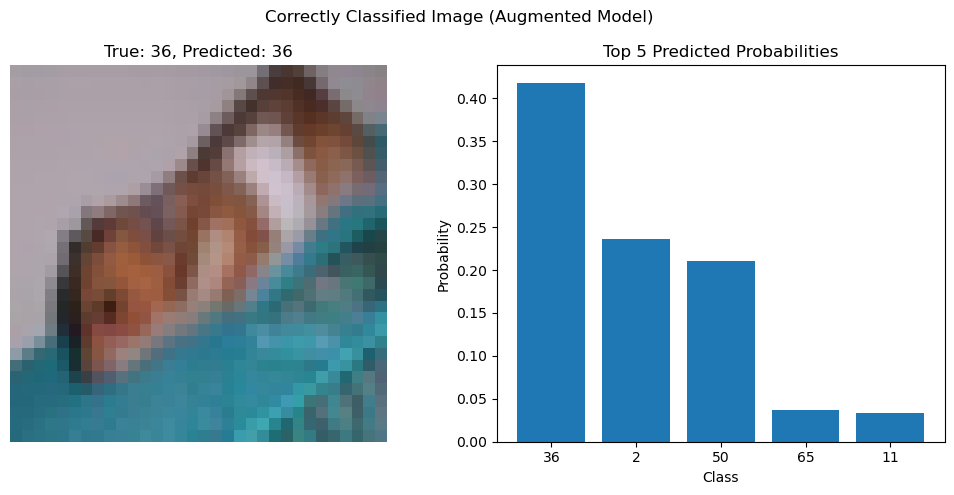

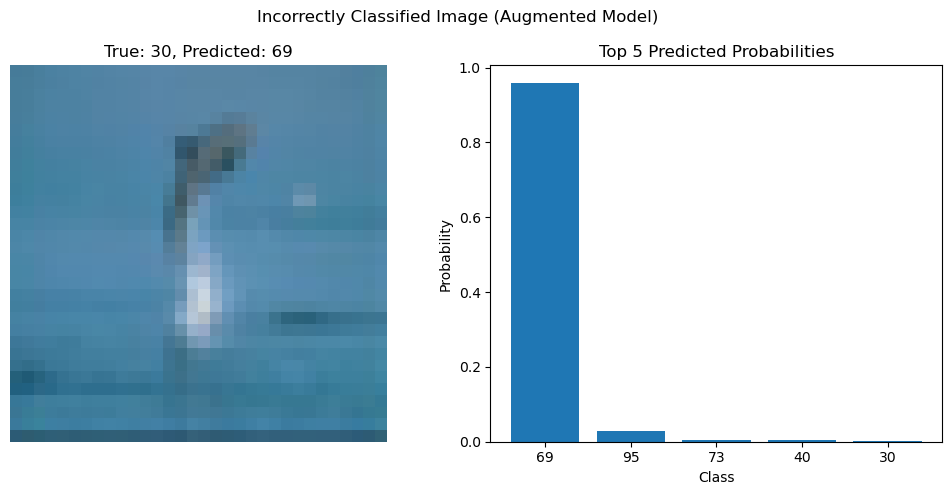

In [24]:
# Find indices of correct and incorrect predictions
correct_indices_aug = np.where(y_pred_classes_aug == y_true_classes)[0]
incorrect_indices_aug = np.where(y_pred_classes_aug != y_true_classes)[0]

# Select one correct and one incorrect prediction
correct_idx_aug = np.random.choice(correct_indices_aug)
incorrect_idx_aug = np.random.choice(incorrect_indices_aug)

# Function to plot image and probabilities
def plot_prediction_aug(idx, title):
    plt.figure(figsize=(10, 5))
    
    # Plot image
    plt.subplot(1, 2, 1)
    plt.imshow(x_test[idx])
    plt.title(f"True: {y_true_classes[idx]}, Predicted: {y_pred_classes_aug[idx]}")
    plt.axis('off')
    
    # Plot probabilities
    plt.subplot(1, 2, 2)
    top_5_idx = np.argsort(y_pred_aug[idx])[-5:][::-1]
    top_5_probs = y_pred_aug[idx][top_5_idx]
    plt.bar(range(5), top_5_probs)
    plt.xticks(range(5), top_5_idx)
    plt.title('Top 5 Predicted Probabilities')
    plt.xlabel('Class')
    plt.ylabel('Probability')
    
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot correct and incorrect predictions
plot_prediction_aug(correct_idx_aug, "Correctly Classified Image (Augmented Model)")
plot_prediction_aug(incorrect_idx_aug, "Incorrectly Classified Image (Augmented Model)")


### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The enhanced model achieved a test accuracy of 59.61% and an F1-score (macro) of 59.34%. While this performance is comparable to the non-augmented model, it does not demonstrate significant improvement. Data augmentation has helped the model generalize slightly better, reducing overfitting and improving its robustness to variations in the test data.

Test Accuracy: 0.6135  
Test F1-score (macro): 0.6129  
Enhanced Model - Test Accuracy: 0.5961  
Enhanced Model - Test F1-score (macro): 0.5934  

Model accuracy decreased when trying to create enhanced model using data augmentation.

The model demonstrates moderate confidence in the true class (36) with a probability of ~0.40. This indicates that while the prediction is correct, the model’s certainty could be improved.  

The model is overly confident in its incorrect prediction (class 69 with a near 1.0 probability), suggesting poor feature differentiation between the true class (30) and predicted class.


Data augmentation introduced variability during training, improving generalization. However, the complexity of CIFAR-100 (with 100 classes) likely limits improvement, as augmented transformations alone may not sufficiently enhance class separation. 

There is potential for further improvement. Techniques such as transfer learning with a pre-trained model (e.g., ResNet, VGG) can be used.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.